Hariharan V S- 24BAD030


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Using Colab cache for faster access to the 'sms-spam-collection-dataset' dataset.
Accuracy : 0.9741564967695621
Precision: 0.9015544041450777
Recall   : 0.9109947643979057
F1 Score : 0.90625
K. Did you call me just now ah?  ham spam
For real when u getting on yo? I only need 2 more tickets and one more jacket and I'm done. I already used all my multis. ham spam
Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx ham spam
New car and house for my parents.:)i have only new job in hand:) ham spam
Would really appreciate if you call me. Just need someone to talk to. spam ham
0.1 0.9755922469490309
1 0.9741564967695621
5 0.9763101220387652


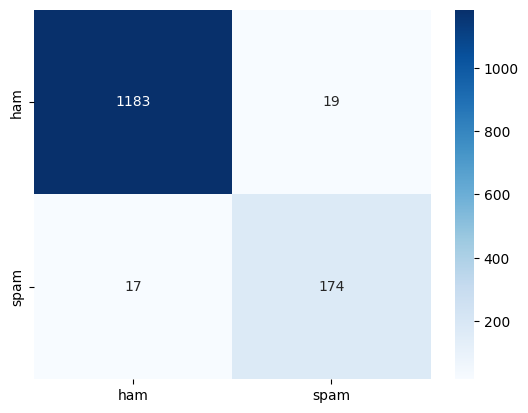

['prize' 'reply' 'stop' 'text' 'claim' 'mobile' 'ur' 'txt' 'free' 'call']
[('call', 347), ('free', 216), ('2', 173), ('txt', 150), ('u', 147), ('ur', 144), ('mobile', 123), ('text', 120), ('4', 119), ('claim', 113)]
[('u', 972), ('im', 449), ('2', 305), ('get', 303), ('ltgt', 276), ('ok', 272), ('dont', 257), ('go', 247), ('ur', 240), ('ill', 236)]


In [14]:
print("Hariharan V S- 24BAD030")
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import kagglehub
import os

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from collections import Counter

nltk.download('stopwords')

path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

dataset_file_path = os.path.join(path, "spam.csv")

df = pd.read_csv(dataset_file_path, encoding='latin-1', header=None)
df = df.iloc[:, :2]
df.columns = ["label", "text"]
df = df.drop(df.index[0]).reset_index(drop=True)

df['text'] = df['text'].fillna('')

stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = "".join([c for c in text if c not in string.punctuation])
    words = [w for w in text.split() if w not in stop_words]
    return " ".join(words)

df["clean_text"] = df["text"].apply(clean_text)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["clean_text"])

encoder = LabelEncoder()
y = encoder.fit_transform(df["label"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

model = MultinomialNB(alpha=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

mis_idx = np.where(y_test != y_pred)[0][:5]
for i in mis_idx:
    print(df["text"].iloc[i],
          encoder.inverse_transform([y_test[i]])[0],
          encoder.inverse_transform([y_pred[i]])[0])

for a in [0.1, 1, 5]:
    m = MultinomialNB(alpha=a)
    m.fit(X_train, y_train)
    print(a, m.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.show()

features = vectorizer.get_feature_names_out()
top_spam = np.argsort(model.feature_log_prob_[1])[-10:]
print(features[top_spam])

spam_words = " ".join(df[df["label"] == "spam"]["clean_text"]).split()
ham_words  = " ".join(df[df["label"] == "ham"]["clean_text"]).split()

print(Counter(spam_words).most_common(10))
print(Counter(ham_words).most_common(10))